## Loading Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

## Data Loading

In [31]:
df=pd.read_csv("ecommerce_customer_behavior_dataset.csv")
df.head()

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High


## Data Pre-Processing

In [32]:
## Checking Missing Values 
df.isnull().sum()

Customer ID                    0
Age                            0
Gender                         0
Location                       0
Product Category               0
Purchase Amount ($)            0
Time Spent on Website (min)    0
Device Type                    0
Payment Method                 0
Discount Availed               0
Number of Items Purchased      0
Return Customer                0
Review Score (1-5)             0
Delivery Time (days)           0
Subscription Status            0
Customer Satisfaction          0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  10000 non-null  int64  
 1   Age                          10000 non-null  int64  
 2   Gender                       10000 non-null  object 
 3   Location                     10000 non-null  object 
 4   Product Category             10000 non-null  object 
 5   Purchase Amount ($)          10000 non-null  float64
 6   Time Spent on Website (min)  10000 non-null  int64  
 7   Device Type                  10000 non-null  object 
 8   Payment Method               10000 non-null  object 
 9   Discount Availed             10000 non-null  bool   
 10  Number of Items Purchased    10000 non-null  int64  
 11  Return Customer              10000 non-null  bool   
 12  Review Score (1-5)           10000 non-null  int64  
 13  Delivery Time (da

In [34]:
df.describe()

,Customer ID,Age,Purchase Amount ($),Time Spent on Website (min),Number of Items Purchased,Review Score (1-5),Delivery Time (days)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,43.789900,503.892494,29.918400,4.998500,2.995100,7.013000
std,2886.89568,15.005521,286.238084,17.002107,2.574988,1.404163,3.721561
min,1.00000,18.000000,5.190000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,31.000000,254.937500,15.000000,3.000000,2.000000,4.000000
50%,5000.50000,44.000000,506.195000,30.000000,5.000000,3.000000,7.000000
75%,7500.25000,57.000000,749.135000,45.000000,7.000000,4.000000,10.000000
max,10000.00000,69.000000,999.980000,59.000000,9.000000,5.000000,13.000000


Since the Data is clean we can deep dive into the analysis !

## **Level 1: Basic Insights**

In [35]:
df.head()

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High


### Q1: Find Mean, Median, and Mode (Age)

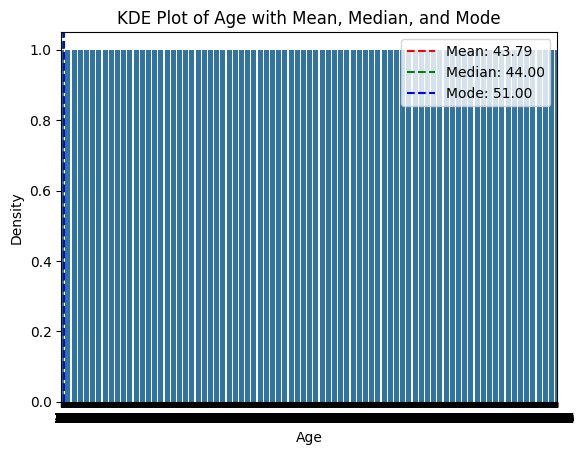

In [36]:
sns.countplot(df["Age"])

# Calculate mean, median, and mode
mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0]

# Annotate mean, median, and mode
plt.axvline(mean_age, color='r', linestyle='--', label='Mean: {:.2f}'.format(mean_age))
plt.axvline(median_age, color='g', linestyle='--', label='Median: {:.2f}'.format(median_age))
plt.axvline(mode_age, color='b', linestyle='--', label='Mode: {:.2f}'.format(mode_age))

# Add a legend
plt.legend()

# Show the plot
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot of Age with Mean, Median, and Mode')
plt.show()

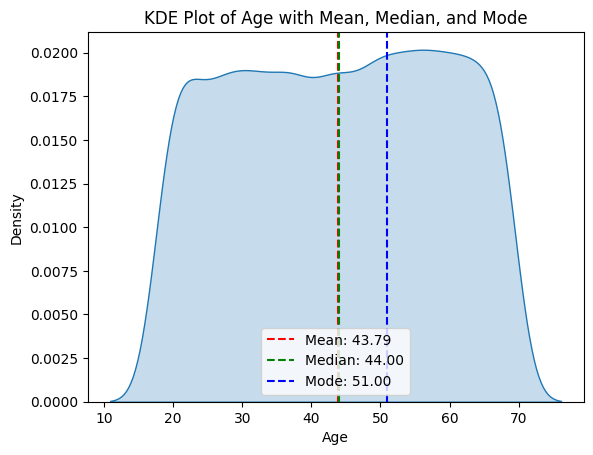

In [37]:


# Create the KDE plot
sns.kdeplot(df['Age'], fill=True)

# Calculate mean, median, and mode
mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0]

# Annotate mean, median, and mode
plt.axvline(mean_age, color='r', linestyle='--', label='Mean: {:.2f}'.format(mean_age))
plt.axvline(median_age, color='g', linestyle='--', label='Median: {:.2f}'.format(median_age))
plt.axvline(mode_age, color='b', linestyle='--', label='Mode: {:.2f}'.format(mode_age))

# Add a legend
plt.legend()

# Show the plot
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot of Age with Mean, Median, and Mode')
plt.show()


In [38]:
mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0] 

print(mean_age)
print(median_age)
print(mode_age)

43.7899
44.0
51


In [39]:
import plotly.figure_factory as ff

mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0]  


fig = ff.create_distplot([df['Age']], ['Age'], show_hist=False, curve_type='kde')

# Add lines for mean, median, and mode with annotations
fig.add_vline(x=mean_age, line_width=2, line_dash='dash', line_color='red', annotation_text=f"Mean: {mean_age:.2f}", annotation_position="top left")
fig.add_vline(x=median_age, line_width=2, line_dash='dash', line_color='green', annotation_text=f"Median: {median_age:.2f}", annotation_position="top right")
fig.add_vline(x=mode_age, line_width=2, line_dash='dash', line_color='blue', annotation_text=f"Mode: {mode_age:.2f}", annotation_position="bottom left")


# Update layout for better appearance
fig.update_layout(
    title='Age Distribution with Mean, Median, and Mode',
    xaxis_title='Age',
    yaxis_title='Density',
    showlegend=False
)

# Show the plot
fig.show()


## Q2: Find variance, standard deviation, and z-score (Purchase Amount)

In [40]:
df.head()

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High


In [41]:
# Calculate variance and standard deviation
variance = df['Purchase Amount ($)'].var()
standard_deviation = df['Purchase Amount ($)'].std()

# Calculate z-scores
mean_purchase_amount = df['Purchase Amount ($)'].mean()
df['Z-Score'] = (df['Purchase Amount ($)'] - mean_purchase_amount) / standard_deviation

# Display results
print(f"Variance of Purchase Amount: {variance:.2f}")
print(f"Standard Deviation of Purchase Amount: {standard_deviation:.2f}")
print("Z-Scores for Purchase Amount:")
df[['Purchase Amount ($)', 'Z-Score']]


Variance of Purchase Amount: 81932.24
Standard Deviation of Purchase Amount: 286.24
Z-Scores for Purchase Amount:


,Purchase Amount ($),Z-Score
0,202.54,-1.052804
1,655.94,0.531192
2,963.65,1.606207
3,485.59,-0.063942
4,143.27,-1.259869
...,...,...
9995,99.23,-1.413727
9996,797.81,1.026829
9997,820.17,1.104946
9998,34.94,-1.638330


In [42]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

# Sample DataFrame (replace with your actual DataFrame)
# df = pd.read_csv('your_dataset.csv')

# Calculate statistics
mean_purchase_amount = df['Purchase Amount ($)'].mean()
std_dev_purchase_amount = df['Purchase Amount ($)'].std()

# Calculate z-scores
df['Z-Score'] = (df['Purchase Amount ($)'] - mean_purchase_amount) / std_dev_purchase_amount

# Create a histogram of Purchase Amount with a KDE
fig = go.Figure()

# Histogram for Purchase Amount
fig.add_trace(go.Histogram(
    x=df['Purchase Amount ($)'],
    name='Purchase Amount',
    opacity=0.6,
    histnorm='probability density',  # Normalizes the histogram
    marker_color='lightblue',
))

# Add a KDE line for Purchase Amount
kde_x = np.linspace(df['Purchase Amount ($)'].min(), df['Purchase Amount ($)'].max(), 100)
kde_y = px.data.tips()['total_bill'].values # You can use your KDE calculation here

fig.add_trace(go.Scatter(
    x=kde_x,
    y=kde_y,
    mode='lines',
    name='KDE',
    line=dict(color='blue', width=2)
))

# Add mean and standard deviation lines
fig.add_trace(go.Scatter(
    x=[mean_purchase_amount, mean_purchase_amount],
    y=[0, 0.04],  # Adjust y based on the density
    mode='lines',
    name='Mean',
    line=dict(color='red', dash='dash')
))

fig.add_trace(go.Scatter(
    x=[mean_purchase_amount + std_dev_purchase_amount, mean_purchase_amount + std_dev_purchase_amount],
    y=[0, 0.04],
    mode='lines',
    name='Mean + 1 SD',
    line=dict(color='orange', dash='dash')
))

fig.add_trace(go.Scatter(
    x=[mean_purchase_amount - std_dev_purchase_amount, mean_purchase_amount - std_dev_purchase_amount],
    y=[0, 0.04],
    mode='lines',
    name='Mean - 1 SD',
    line=dict(color='orange', dash='dash')
))

# Create a second y-axis for Z-Scores
fig.add_trace(go.Histogram(
    x=df['Z-Score'],
    name='Z-Scores',
    opacity=0.6,
    histnorm='probability density',
    marker_color='lightgreen',
    yaxis='y2'
))

# Update layout
fig.update_layout(
    title='Distribution of Purchase Amount with Mean, SD, and Z-Scores',
    xaxis_title='Values',
    yaxis_title='Density',
    yaxis2=dict(title='Z-Scores Density', overlaying='y', side='right'),
    barmode='overlay',
)

# Show the plot
fig.show()


### Q3: What are the top three product categories based on the number of purchases?

In [43]:
df.head()

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction,Z-Score
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low,-1.052804
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium,0.531192
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium,1.606207
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium,-0.063942
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High,-1.259869


In [44]:
top_3=df.groupby("Product Category")["Number of Items Purchased"].sum().sort_values(ascending=False)

In [47]:
top_3

Product Category
Toys           6580
Books          6533
Electronics    6469
Clothing       6359
Home           6214
Groceries      6067
Beauty         6057
Sports         5706
Name: Number of Items Purchased, dtype: int64

In [46]:
# Create a count plot using Plotly
fig = px.bar(
    top_3,
    x=top_3.index,
    y=top_3.values,
    labels={'x': 'Product Category', 'y': 'Count'},
    title='Top 3 Product Categories',
    color=top_3.index,
)

# Show the plot
fig.show()

### Q4: How many customers are classified as return customers?

In [48]:
df.head()

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction,Z-Score
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low,-1.052804
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium,0.531192
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium,1.606207
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium,-0.063942
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High,-1.259869


In [62]:
df.Gender.value_counts()

Gender
Male      3349
Female    3338
Other     3313
Name: count, dtype: int64

In [63]:
return_customer=df.groupby("Gender")['Return Customer'].value_counts()

In [72]:
import plotly.express as px

# Count occurrences of 'Return Customer'
return_customer_counts = df['Return Customer'].value_counts()

# Create a bar chart
fig = px.bar(
    x=return_customer_counts.index,
    y=return_customer_counts.values,
    labels={'x': 'Return Customer', 'y': 'Count'},
    title='Count of Return Customers vs. Non-Return Customers',
    color=return_customer_counts.index,
    color_discrete_sequence=px.colors.qualitative.Set1,  # Choose a color scheme
)

# Show the plot
fig.show()


In [73]:
import plotly.express as px

# Prepare data for pie chart by Gender and Return Customer status
return_customer_gender_counts = df.groupby(['Gender', 'Return Customer']).size().reset_index(name='Count')

# Create a pie chart
pie_fig = px.pie(
    return_customer_gender_counts,
    values='Count',
    names='Return Customer',
    title='Distribution of Return Customers by Gender',
    color='Return Customer',
    color_discrete_sequence=px.colors.qualitative.Set1,
    facet_col='Gender',  # Create separate pie charts for each gender
)

# Show the pie chart
pie_fig.show()


### Q5: What is the average review score given by customers?

In [74]:
df.head()

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction,Z-Score
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low,-1.052804
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium,0.531192
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium,1.606207
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium,-0.063942
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High,-1.259869


In [75]:
df["Review Score (1-5)"].mean()

2.9951

In [79]:
import plotly.figure_factory as ff

mean_rs = df["Review Score (1-5)"].mean()

fig = ff.create_distplot([df["Review Score (1-5)"]], ["Review Score (1-5)"], show_hist=False, curve_type='kde')

# Add lines for mean, median, and mode with annotations
fig.add_vline(x=mean_rs, line_width=2, line_dash='dash', line_color='red', annotation_text=f"Mean: {mean_rs}", annotation_position="top left")


# Update layout for better appearance
fig.update_layout(
    title='Age Distribution with Mean, Median, and Mode',
    xaxis_title='Age',
    yaxis_title='Density',
    showlegend=False
)

# Show the plot
fig.show()


In [86]:
import plotly.figure_factory as ff

# Calculate the average review score
mean_rs = df["Review Score (1-5)"].mean()

# Create a distribution plot for Review Score
fig = ff.create_distplot([df["Review Score (1-5)"]], ["Review Score (1-5)"], show_hist=False, curve_type='kde')

# Add a line for the mean with an annotation
fig.add_vline(x=mean_rs, line_width=2, line_dash='dash', line_color='red', annotation_text=f"Average: {mean_rs}", annotation_position="top left")

# Update layout for better appearance
fig.update_layout(
    title='Average Review Score Distribution',
    xaxis_title='Review Score (1-5)',
    yaxis_title='Density',
    showlegend=False
)

# Show the plot
fig.show()


### Q6: How does the average delivery time vary between subscription statuses (Free,Premium)?

In [80]:
df.head()

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction,Z-Score
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low,-1.052804
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium,0.531192
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium,1.606207
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium,-0.063942
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High,-1.259869


In [83]:
df.groupby("Subscription Status")["Delivery Time (days)"].mean()

Subscription Status
Free       6.963924
Premium    7.070347
Trial      7.004272
Name: Delivery Time (days), dtype: float64

In [88]:
import plotly.express as px

# Create a DataFrame for visualization
avg_delivery_time = df.groupby("Subscription Status")["Delivery Time (days)"].mean().reset_index()

# Create a vertical bar chart
bar_fig = px.bar(
    avg_delivery_time,
    x='Delivery Time (days)',
    y='Subscription Status',
    title='Average Delivery Time by Subscription Status',
    labels={'Delivery Time (days)': 'Average Delivery Time (days)', 'Subscription Status': 'Subscription Status'},
    color='Subscription Status',
    color_discrete_sequence=px.colors.qualitative.Set1,  # Use a color sequence
    orientation='h'  # Horizontal bar chart
)

# Show the vertical bar chart
bar_fig.show()


### Q7: How many customers are subscribed to the service?

In [89]:
df.head()

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction,Z-Score
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low,-1.052804
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium,0.531192
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium,1.606207
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium,-0.063942
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High,-1.259869


In [96]:
subscription_counts=df["Subscription Status"].value_counts().reset_index()

In [100]:
import plotly.express as px

# Prepare the data for visualization
subscription_counts = df["Subscription Status"].value_counts().reset_index()
subscription_counts.columns = ['Subscription Status', 'Count']

# Create a bar chart
bar_fig = px.bar(
    subscription_counts,
    x='Subscription Status',
    y='Count',
    title='Number of Customers by Subscription Status',
    labels={'Count': 'Number of Customers'},
    color='Subscription Status',
    color_discrete_sequence=px.colors.qualitative.Set1,
)

# Show the bar chart
bar_fig.show()


### Q8: What percentage of customers used devices to make purchases? (Mobile, Desktop,Tablet)

In [101]:
df.head()

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction,Z-Score
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low,-1.052804
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium,0.531192
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium,1.606207
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium,-0.063942
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High,-1.259869


In [102]:
df["Device Type"].value_counts()

Device Type
Mobile     3374
Desktop    3348
Tablet     3278
Name: count, dtype: int64

In [103]:
device_counts = df["Device Type"].value_counts()
total_counts = device_counts.sum()
device_percentages = (device_counts / total_counts) * 100
device_percentages

Device Type
Mobile     33.74
Desktop    33.48
Tablet     32.78
Name: count, dtype: float64

In [104]:
# Convert to DataFrame for easier plotting
device_percentage_df = device_percentages.reset_index()
device_percentage_df.columns = ['Device Type', 'Percentage']

# Step 3: Create a bar chart to visualize the percentages
bar_fig = px.bar(
    device_percentage_df,
    x='Device Type',
    y='Percentage',
    title='Percentage of Customers by Device Type',
    color='Device Type',
    color_discrete_sequence=px.colors.qualitative.Set2,
)

# Show the bar chart
bar_fig.show()

In [106]:
# Step 3: Create a pie chart to visualize the percentages
pie_fig = px.pie(
    device_percentage_df,
    values='Percentage',
    names='Device Type',
    title='Percentage of Customers by Device Type',
    color='Device Type',
    color_discrete_sequence=px.colors.qualitative.Set1,
)

# Show the pie chart
pie_fig.show()

### Q9: What is the average purchase amount for customers who availed discounts compared to those who didn’t?

In [107]:
df.head()

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction,Z-Score
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low,-1.052804
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium,0.531192
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium,1.606207
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium,-0.063942
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High,-1.259869


In [109]:
df.groupby("Discount Availed")["Purchase Amount ($)"].mean()

Discount Availed
False    502.511451
True     505.264178
Name: Purchase Amount ($), dtype: float64

### Q10: What is the most common payment method used by customers?

In [110]:
df.head()

,Customer ID,Age,Gender,Location,Product Category,Purchase Amount ($),Time Spent on Website (min),Device Type,Payment Method,Discount Availed,Number of Items Purchased,Return Customer,Review Score (1-5),Delivery Time (days),Subscription Status,Customer Satisfaction,Z-Score
0,1,20,Other,Dhaka,Toys,202.54,44,Mobile,Cash on Delivery,True,4,True,5,4,Free,Low,-1.052804
1,2,39,Male,Rangpur,Sports,655.94,27,Desktop,Bank Transfer,True,1,False,1,7,Free,Medium,0.531192
2,3,64,Male,Khulna,Home,963.65,9,Tablet,Bank Transfer,False,8,True,4,9,Premium,Medium,1.606207
3,4,65,Other,Rajshahi,Beauty,485.59,39,Desktop,Bank Transfer,True,1,True,5,10,Trial,Medium,-0.063942
4,5,67,Male,Rangpur,Home,143.27,17,Tablet,Debit Card,False,8,True,4,1,Premium,High,-1.259869


In [111]:
df["Payment Method"].value_counts().sort_values(ascending=False)

Payment Method
Bank Transfer       2067
Credit Card         2028
Cash on Delivery    2007
Debit Card          1983
PayPal              1915
Name: count, dtype: int64